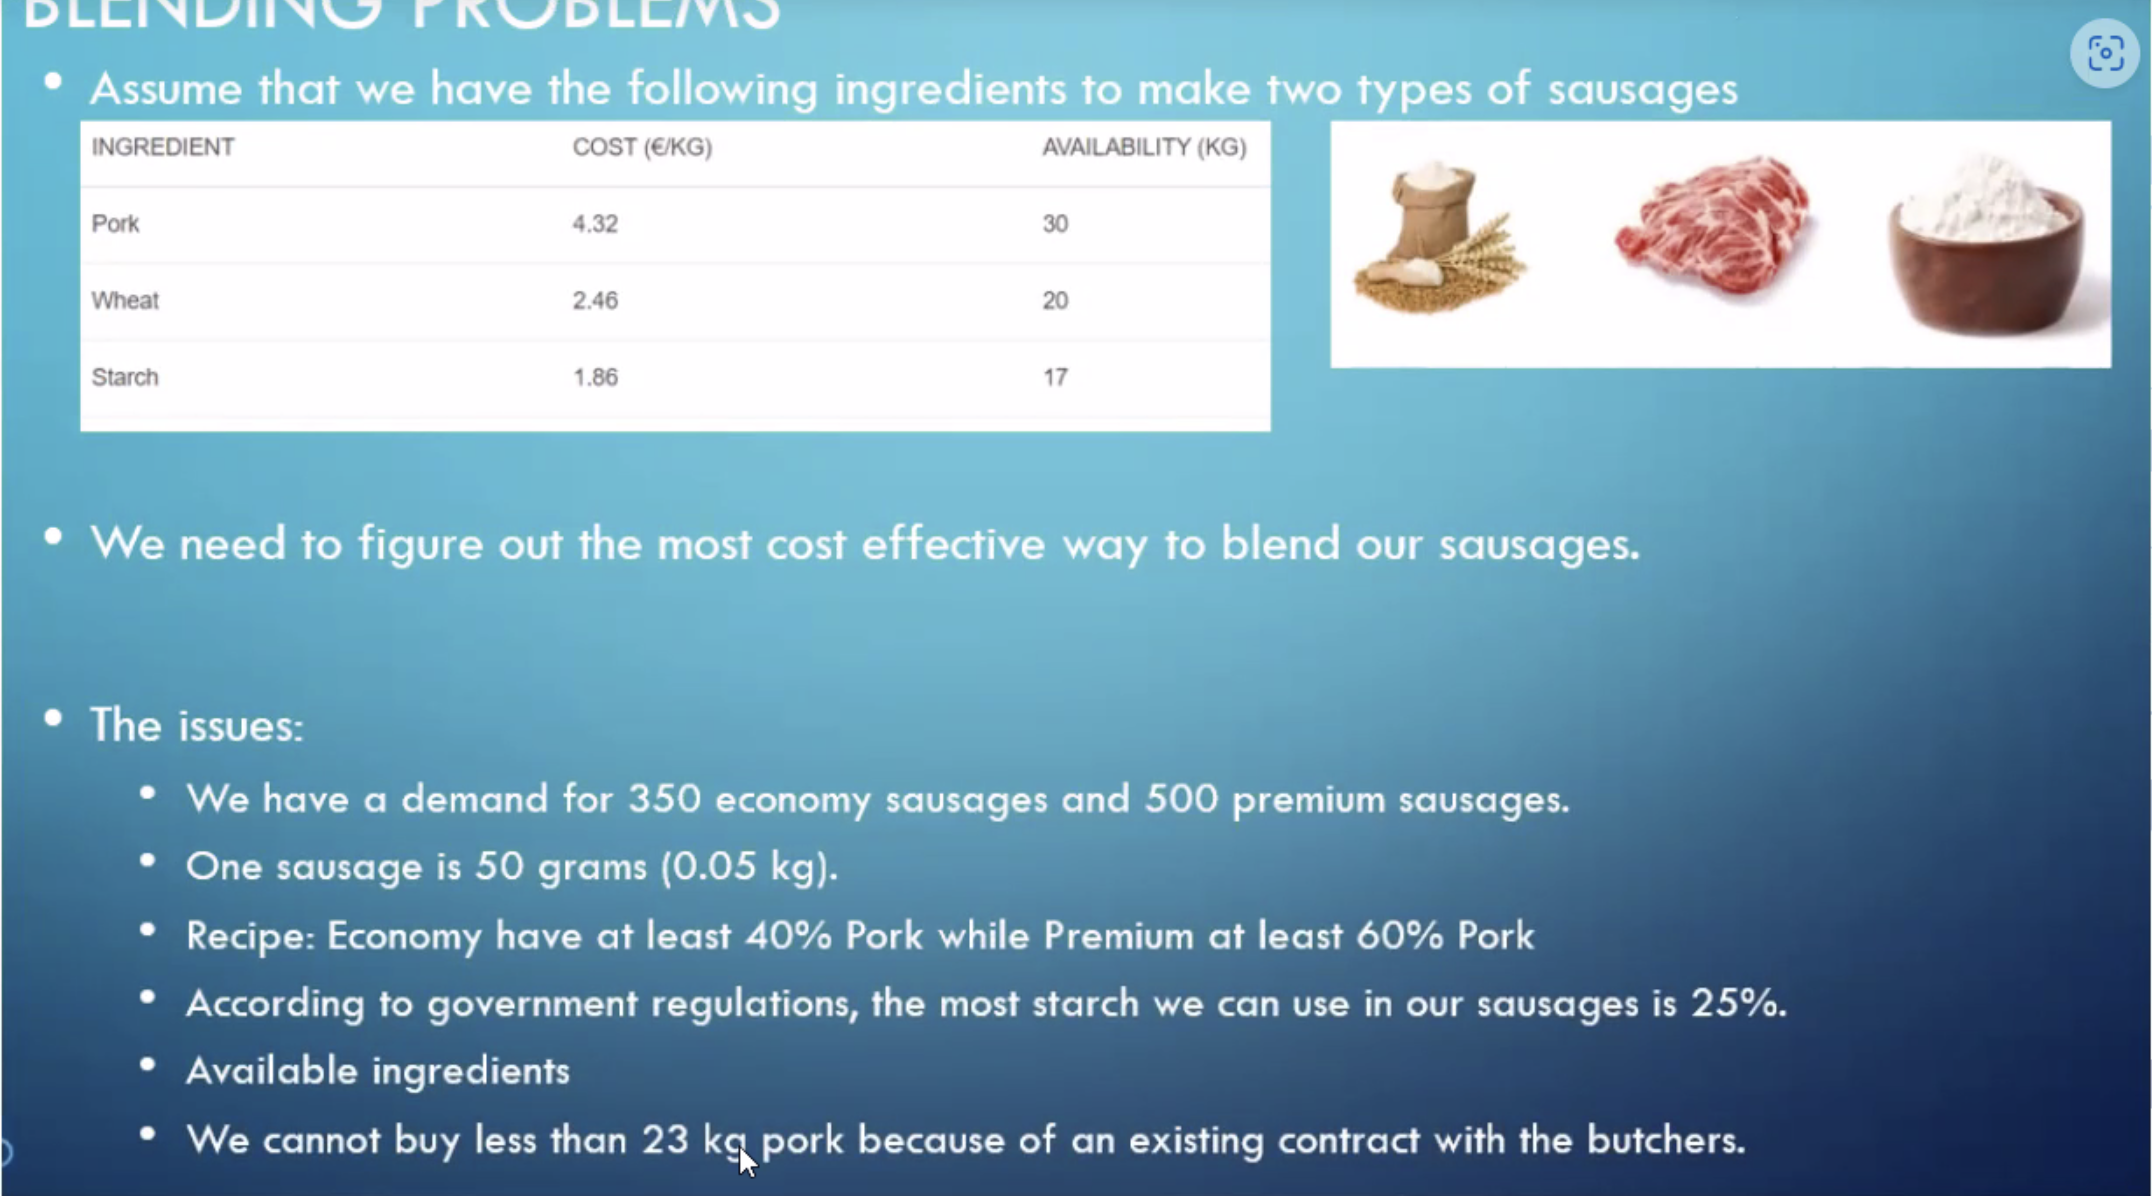

In [1]:
# Objective function: Minimize cost,4.32(pe+pp) + 2.46(we+wp) + 1.86(se+sp)
# pe + we + se = 350*0.5, pp + wp + sp = 500*0.05
# pe >= 0.4(pe+we+se), pp >= 0.6(pp+wp+sp)
# se <= 0.25(pe+we+se), sp <= 0.25(pp+wp+sp)
# pe + pp <= 30, we + wp <= 20, se + sp <= 17
# pe + pp >= 23

import pulp

# Instantiate our problem class
Lp_prob = pulp.LpProblem("Cost minimising blending problem", pulp.LpMinimize)

# Construct our decision variable lists
sausage_types = ['economy', 'premium']
ingredients = ['pork', 'wheat', 'starch']

#Decclare Variables
ing_weight = pulp.LpVariable.dicts("weight kg",
                                     ((i, j) for i in sausage_types for j in ingredients),
                                     lowBound=0,
                                     cat='Continuous')
print("Variables \n",ing_weight )

# Objective Function
Lp_prob += ( pulp.lpSum([ 4.32 * ing_weight[(i, 'pork')] + 2.46 * ing_weight[(i, 'wheat')] 
                       + 1.86 * ing_weight[(i, 'starch')] for i in sausage_types]))

# Constraints
# 350 economy and 500 premium sausages at 0.05 kg
Lp_prob += pulp.lpSum([ing_weight['economy', j] for j in ingredients]) == 350 * 0.05
Lp_prob += pulp.lpSum([ing_weight['premium', j] for j in ingredients]) == 500 * 0.05

# Economy has >= 40% pork, premium >= 60% pork
Lp_prob += ing_weight['economy', 'pork'] >= (
    0.4 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

Lp_prob += ing_weight['premium', 'pork'] >= (
    0.6 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# Sausages must be <= 25% starch
Lp_prob += ing_weight['economy', 'starch'] <= (
    0.25 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

Lp_prob += ing_weight['premium', 'starch'] <= (
    0.25 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# We have at most 30 kg of pork, 20 kg of wheat and 17 kg of starch available
Lp_prob += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) <= 30
Lp_prob += pulp.lpSum([ing_weight[i, 'wheat'] for i in sausage_types]) <= 20
Lp_prob += pulp.lpSum([ing_weight[i, 'starch'] for i in sausage_types]) <= 17

# We have at least 23 kg of pork to use up
Lp_prob += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) >= 23

# Solve our problem
status = Lp_prob.solve()
# Display 
print("\nDisplaying the problem\n------------------------\n", Lp_prob)
  
print("\nSolution Status\n------------------------\n", pulp.LpStatus[status])   # The solution status
  
print("\nFinal Solution \n------------------------\n", ) 


for var in ing_weight:
    var_value = ing_weight[var].varValue
    print ("The weight of ",var[1]," in ",var[0]," sausages is ",var_value," kg")
total_cost = pulp.value( Lp_prob.objective)

print ("The total cost is €{} for 350 economy sausages and 500 premium sausages".format(round(total_cost, 2)))


Variables 
 {('economy', 'pork'): weight_kg_('economy',_'pork'), ('economy', 'wheat'): weight_kg_('economy',_'wheat'), ('economy', 'starch'): weight_kg_('economy',_'starch'), ('premium', 'pork'): weight_kg_('premium',_'pork'), ('premium', 'wheat'): weight_kg_('premium',_'wheat'), ('premium', 'starch'): weight_kg_('premium',_'starch')}
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/michaelkhanda/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gt/2rwqh0s57lz9g2_vgnmc4q800000gn/T/bdf51cbca98841349d0a02994b569288-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/gt/2rwqh0s57lz9g2_vgnmc4q800000gn/T/bdf51cbca98841349d0a02994b569288-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 48 RHS
At line 59 BOUNDS
At line 60 ENDATA
Problem MODEL has 10 rows, 6 columns and 26 elements
Coin0008I MODEL read with 0 errors
Option for timeMode c

/Users/michaelkhanda/opt/anaconda3/lib/python3.9/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
